# Linear Regression model for Prediction of Startup price

In [2]:
# import the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
# load dataset
df = pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# summary statistics
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#### Data Description
 
The independent variables(x) used in this dataset are R&D spending, Administration and Marketing Spending.
The dependent variable(y) is Profit.

    No missing values.
    
    All numerical features are floats.
    
    State is a categorical variable → needs encoding.
    
    R&D Spend shows a strong spread and likely has a direct influence on Profit

In [8]:
# checking the missing values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## Encoding Categorical Variable and Split the Data

    Encode State using one-hot encoding (because it's categorical).
    Separate features (x) and target (y).
    Split the data into training and testing sets.

In [10]:
# One-hot encode the 'State' column
data_encoded = pd.get_dummies(df, columns=['State'], drop_first=True)

# Features and Target
x = data_encoded.drop('Profit', axis=1)   # independent feature
y = data_encoded['Profit']                # Dependent feature (target variable)

In [11]:
# tarin-test split
from sklearn.model_selection import train_test_split 

In [12]:
# Train-Test Split (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [13]:
x_test

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
13,91992.39,135495.07,252664.93,False,False
39,38558.51,82982.09,174999.30,False,False
30,61994.48,115641.28,91131.24,True,False
45,1000.23,124153.04,1903.93,False,True
17,94657.16,145077.58,282574.31,False,True
48,542.05,51743.15,0.00,False,True
26,75328.87,144135.98,134050.07,True,False
25,64664.71,139553.16,137962.62,False,False
32,63408.86,129219.61,46085.25,False,False
19,86419.70,153514.11,0.00,False,True


In [14]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
Name: Profit, dtype: float64

## Train the Model

In [16]:
# Initializing the model

from sklearn.linear_model import LinearRegression

In [17]:
# initializing the model
model = LinearRegression()

# Fit the model on training data
model.fit(x_train,y_train)

LinearRegression()

In [18]:
# Make Predictions on Test Data
y_pred = model.predict(x_test)

In [19]:
y_pred

array([126362.87908255,  84608.45383634,  99677.49425147,  46357.46068582,
       128750.48288504,  50912.4174188 , 109741.35032702, 100643.24281647,
        97599.27574594, 113097.42524432])

## Visualization of Predictions vs Actual

In [21]:
# Compare Actual vs Predicted values

comparison_df = pd.DataFrame({
    'Actual Profit': y_test.values,
    'Predicted Profit': y_pred.round(2),
    'Differcence in Actual and pred': np.subtract(y_test.values, y_pred.round(2))
})

print(comparison_df)


   Actual Profit  Predicted Profit  Differcence in Actual and pred
0      134307.35         126362.88                         7944.47
1       81005.76          84608.45                        -3602.69
2       99937.59          99677.49                          260.10
3       64926.08          46357.46                        18568.62
4      125370.37         128750.48                        -3380.11
5       35673.41          50912.42                       -15239.01
6      105733.54         109741.35                        -4007.81
7      107404.34         100643.24                         6761.10
8       97427.84          97599.28                         -171.44
9      122776.86         113097.43                         9679.43


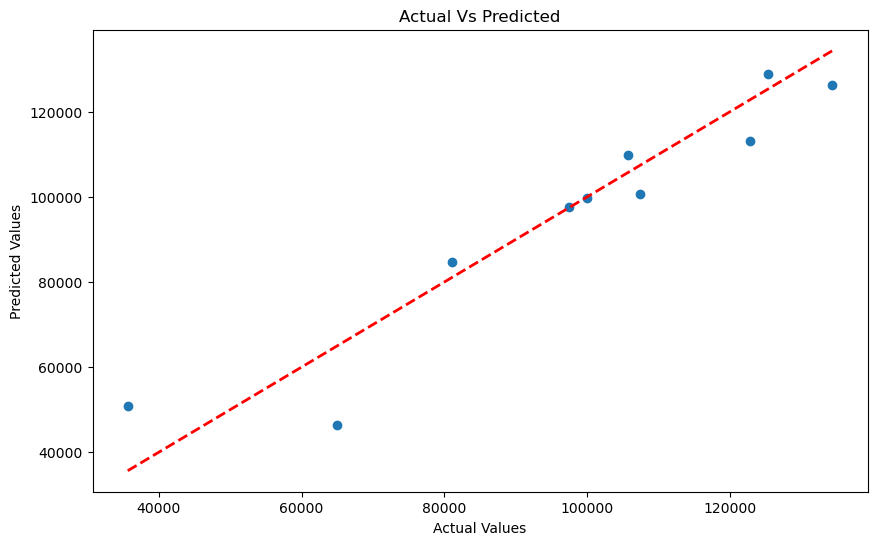

In [22]:
# plot the scatter plot to find the relation between actual values and predicted values

plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred)
# Plot the perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual Vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show() 

## Evaluation parameters

In [24]:
# Evaluation parameters
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [25]:
mse = mean_squared_error(y_test, y_pred)
mse

82010363.04430102

In [26]:
rmse = np.sqrt(mse)
rmse

9055.957323458466

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mae

6961.477813252382

In [28]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.8987266414328637


An R² score(Coefficient of Determination) of 0.8987 means the model explains approximately 90% of the variation in Profit.
Our model captures almost all the important patterns in the data.

In [30]:
data_encoded.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [31]:
print(model.coef_)

[ 8.05630064e-01 -6.87878823e-02  2.98554429e-02  9.38793006e+02
  6.98775997e+00]


In [32]:
coefficients = pd.DataFrame({'Features': x.columns, 'Coefficients': model.coef_}).sort_values(by = 'Coefficients', ascending = False)

In [33]:
print(coefficients)

          Features  Coefficients
3    State_Florida    938.793006
4   State_New York      6.987760
0        R&D Spend      0.805630
2  Marketing Spend      0.029855
1   Administration     -0.068788


    For every 1 unit increase in R&D, profit increases by ~0.81 units (keeping others constant).

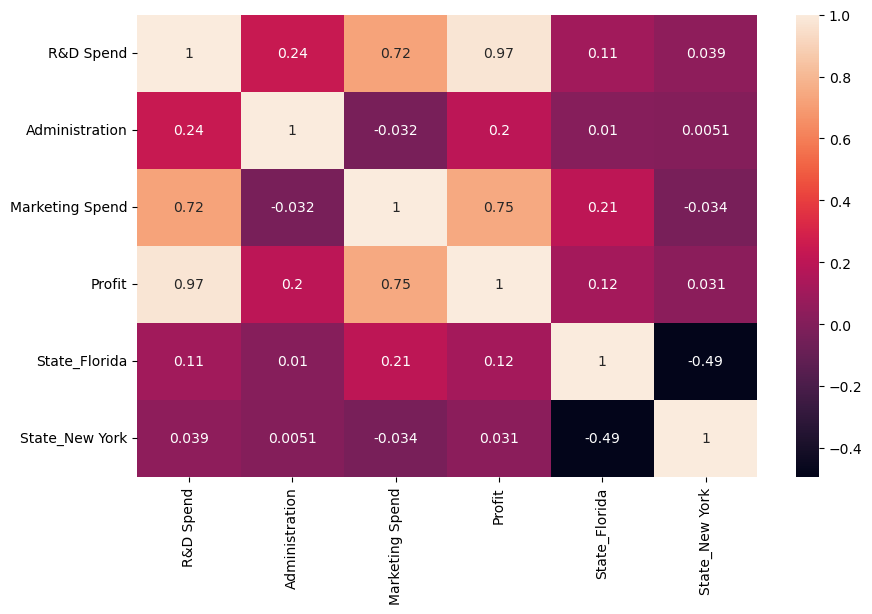

In [35]:
# Checking for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(data_encoded.corr(), annot=True)
plt.show()

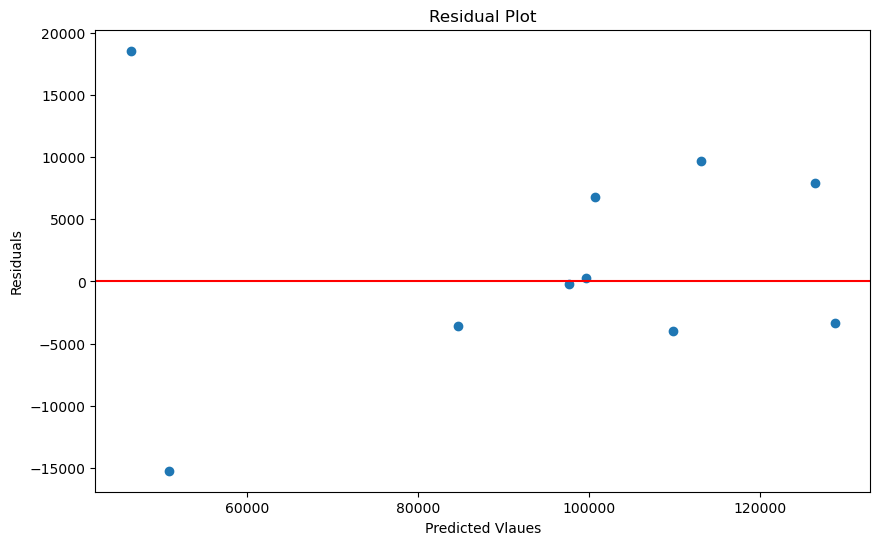

In [36]:
# calculate the residuals(errors)

residuals = y_test - y_pred

# plot the residuals
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals)
plt.axhline(y= 0,color ='r',linestyle = '-')
plt.xlabel('Predicted Vlaues')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

    Residuals are randomly scattered around the zero line → Suggests that the model captures the linear pattern well.
    Confirms that Linear Regression is appropriate for this dataset.


### Model Performance Review (Linear Regression)

- **R² Score**: `0.8987` → Model explains ~90% of variance in Profiits).
- **Top Influencer**: R&D Spend → Strongest positive correlation with Profit.
- **Location Impact**: Minimal → Business success more dependent on R&D than State.
- **Model Fit**: Good generalization on unseen data (20% test set).

✅ **Conclusion**: Strong baseline model with high explanatory power. Clean, interpretable, and practical for business insights.
